## Projeto-ML-Classificacao- Previsoes-de-digitos-usando-KNN

Faremos previsões de dígitos escritos a mão no dataset mnist. modelo terá que prever uma entre 10 saídas possíveis
para cada registro (dígitos de 0 a 10)

In [4]:
# Carregando os pacotes
import numpy as np
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Carregando o dataset
digitos = load_digits()

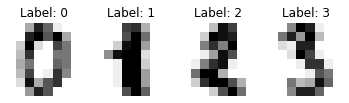

In [8]:
# Visualizando algumas imagens e labels
images_e_labels = list(zip(digitos.images, digitos.target))
for index, (image, label) in enumerate(images_e_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation='nearest')
    plt.title('Label: %i' % label)

In [9]:
# Gera X e Y
X = digitos.data
Y = digitos.target

In [10]:
# Formato do X e Y
X.shape, Y.shape

((1797, 64), (1797,))

### Pré-Processamento e Normalização dos dados

In [11]:
# Divisão em dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X,Y, test_size = 0.30, random_state = 40)

In [13]:
# Divisão dos dados de treino em dados de treino e dados de validação
treinoData, validData, treinoLabels, validLabels = train_test_split(X_treino,
                                                                    y_treino,
                                                                    test_size = 0.1,
                                                                    random_state = 30)

In [14]:
# Imprimindo o número de exemplos em cada dataset
print("Exemplo de Treino: {}".format(len(treinoLabels)))
print("Exemplo de Validação: {}".format(len(validLabels)))
print("Exemplo de Teste: {}".format(len(y_teste)))

Exemplo de Treino: 1131
Exemplo de Validação: 126
Exemplo de Teste: 540


In [16]:
# Normalizando os dados pela média
X_norm = np.mean(X, axis = 0)

# Normalizando os dados de treino e teste
X_treino_norm = treinoData - X_norm
X_valid_norm = validData - X_norm
X_teste_norm = X_teste - X_norm

In [17]:
# shape dos datasets
print(X_treino_norm.shape, X_valid_norm.shape, X_teste_norm.shape)

(1131, 64) (126, 64) (540, 64)


### Descobrindo o Melhor valor e K para nosso modelo KNN

In [31]:
# Range de valores de k que iremos testar
kvals = range(1, 25, 2)

In [32]:
# Lista vazia para receber as acurácia
acuracias = []

In [33]:
# Loop em todos os valores de k para testar cada um deles
for k in kvals:
    # Treinando o modelo KNN com cada valor de k
    modeloKNN = KNeighborsClassifier(n_neighbors=k)
    modeloKNN.fit(treinoData, treinoLabels)
    
    # Avaliando o modelo e atualizando a lista de acurácia
    score = modeloKNN.score(validData, validLabels)
    print("Com o valor de k = %d, a acurácia é = %.2d%%" % (k, score * 100))
    acuracias.append(score)

Com o valor de k = 1, a acurácia é = 100%
Com o valor de k = 3, a acurácia é = 99%
Com o valor de k = 5, a acurácia é = 100%
Com o valor de k = 7, a acurácia é = 99%
Com o valor de k = 9, a acurácia é = 100%
Com o valor de k = 11, a acurácia é = 98%
Com o valor de k = 13, a acurácia é = 97%
Com o valor de k = 15, a acurácia é = 96%
Com o valor de k = 17, a acurácia é = 96%
Com o valor de k = 19, a acurácia é = 96%
Com o valor de k = 21, a acurácia é = 97%
Com o valor de k = 23, a acurácia é = 96%


In [34]:
# Obtendo o valor de K que apresentou a maior acurácia
i = np.argmax(acuracias)
print("O valor de K = %d alcançou a mais alta acurácia de %.2f%% nos dados de validação!" % (kvals[i],
                                                                                            acuracias[i] * 100))

O valor de K = 1 alcançou a mais alta acurácia de 100.00% nos dados de validação!


### Construção e Treinamento do Modelo KNN

In [35]:
# Criando o modelo com o valor de K
modeloFinal = KNeighborsClassifier(n_neighbors= kvals[i])

In [36]:
# Treinamento do modelo
modeloFinal.fit(treinoData, treinoLabels)

KNeighborsClassifier(n_neighbors=1)

### Previsões com Dados de Teste e Avaliação do Modelo

In [37]:
# Previsões com os dados de teste
previsoes = modeloKNN.predict(X_teste)

In [38]:
# Performance do modelo nos dados de teste
print("Avaliação do Modelo nos Dados de Teste")
print(classification_report(y_teste, previsoes))

Avaliação do Modelo nos Dados de Teste
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       0.93      0.99      0.96        68
           2       0.96      0.96      0.96        52
           3       0.98      0.96      0.97        55
           4       0.98      0.98      0.98        53
           5       0.94      0.96      0.95        47
           6       0.97      1.00      0.98        58
           7       0.86      1.00      0.93        50
           8       0.92      0.81      0.86        58
           9       0.98      0.85      0.91        55

    accuracy                           0.95       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.95      0.95      0.95       540



In [39]:
# Confusion Matrix do Modelo Final
print("Confusion Matrix")
print(confusion_matrix(y_teste, previsoes))

Confusion Matrix
[[44  0  0  0  0  0  0  0  0  0]
 [ 0 67  0  0  0  0  1  0  0  0]
 [ 0  0 50  0  0  0  0  0  2  0]
 [ 0  0  0 53  0  0  0  1  1  0]
 [ 0  0  0  0 52  0  0  1  0  0]
 [ 0  0  0  0  1 45  0  0  0  1]
 [ 0  0  0  0  0  0 58  0  0  0]
 [ 0  0  0  0  0  0  0 50  0  0]
 [ 0  5  2  1  0  1  1  1 47  0]
 [ 0  0  0  0  0  2  0  5  1 47]]


Eu acredito que esse dígito seja: 5


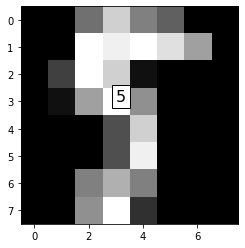

Eu acredito que esse dígito seja: 9


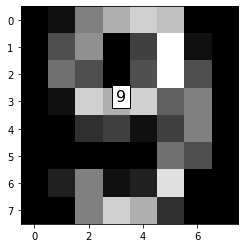

Eu acredito que esse dígito seja: 5


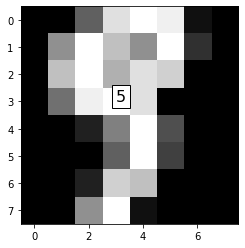

Eu acredito que esse dígito seja: 8


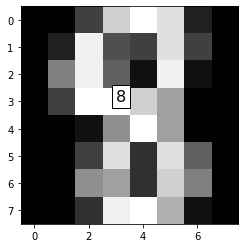

Eu acredito que esse dígito seja: 6


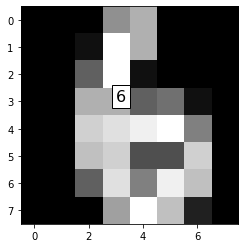

In [42]:
# Fazendo previsões com o modelo treinado usando dados de teste
for i in np.random.randint(0, high=len(y_teste), size=(5,)):
    # Obtém uma imagem e faz a previsão
    image = X_teste[i]
    prediction = modeloFinal.predict([image])[0]
    
    # Mostra as previsões
    imgdata = np.array(image, dtype='float')
    pixels = imgdata.reshape((8,8))
    plt.imshow(pixels, cmap='gray')
    plt.annotate(prediction,(3,3), bbox={'facecolor': 'white'}, fontsize=16)
    print("Eu acredito que esse dígito seja: {}".format(prediction))
    plt.show()

### Previsões em novos dados com o modelo Treinado

In [43]:
# Definindo um novo dígito
novoDigito = [0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  0., 12., 14.,
              0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
              6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16., 13.,  5.,
              0.,  0.,  0., 15., 16.,  9.,  9., 14.,  0.,  0.,  0.,  3., 14.,
              9.,  2., 16.,  2.,  0.,  0.,  0.,  7., 15., 16., 11.,  0.]

In [44]:
# Normalizando o novo dígito
novoDigito_norm = novoDigito - X_norm

In [45]:
# Fazendo a previsão com o modelo treinado
novaPrevisao = modeloFinal.predict([novoDigito_norm])

Eu acredito que esse dígito seja: [6]


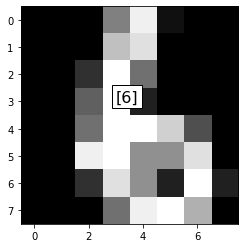

In [46]:
# Previsão do modelo
imgdata = np.array(novoDigito, dtype='float')
pixels = imgdata.reshape((8,8))
plt.imshow(pixels, cmap='gray')
plt.annotate(novaPrevisao,(3,3), bbox={'facecolor':'white'},fontsize=16)
print("Eu acredito que esse dígito seja: {}".format(novaPrevisao))
plt.show()

In [47]:
# Definindo um novo dígito
novoDigito = [0.,  0.,  0.,  1., 11.,  9.,  0.,  0.,  0.,  0.,  0.,  7., 16.,
              13.,  0.,  0.,  0.,  0.,  4., 14., 16.,  9.,  0.,  0.,  0., 10.,
              16., 11., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,
              0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5.,
              16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  6.,  0.,  0.]

In [48]:
# Normalizando o novo dígito
novoDigito_norm = novoDigito - X_norm

In [49]:
# Fazendo a previsão com o modelo treinado
novaPrevisao = modeloFinal.predict([novoDigito_norm])

Eu acredito que esse dígito seja: [1]


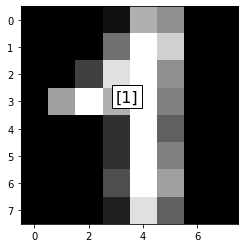

In [50]:
# Previsão do modelo
imgdata = np.array(novoDigito, dtype='float')
pixels = imgdata.reshape((8,8))
plt.imshow(pixels, cmap='gray')
plt.annotate(novaPrevisao,(3,3), bbox={'facecolor':'white'},fontsize=16)
print("Eu acredito que esse dígito seja: {}".format(novaPrevisao))
plt.show()